In [1]:
#import relevant packages for analysis

from __future__ import print_function

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

PROJ_ROOT = os.path.join(os.pardir)

sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")

In [2]:
%load_ext watermark
%watermark -a "Bryan Dickinson" -d -t -v -p numpy,pandas

Bryan Dickinson 2019-09-16 17:04:01 

CPython 3.7.3
IPython 7.7.0

numpy 1.16.4
pandas 0.25.0


***Problem Statement***

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

**Variable Definition**

**User_ID:** User ID

**Product_ID:**	Product ID

**Gender:**	Sex of User

**Age:** Age in bins

**Occupation:**	Occupation (Masked)

**City_Category:**	Category of the City (A,B,C)

**Stay_In_Current_City_Years:**	Number of years stay in current city

**Marital_Status:**	Marital Status

**Product_Category_1:**	Product Category (Masked)

**Product_Category_2:**	Product may belongs to other category also (Masked)

**Product_Category_3:**	Product may belongs to other category also (Masked)

**Purchase:**	Purchase Amount (Target Variable)




In [3]:
#open the data
customer_path = os.path.join(PROJ_ROOT, 
                         'data', 'processed',
                         'clean_data.csv')
data = pd.read_csv(customer_path)

# Visual EDA

**Lets take a look at the Categories, what is the overall split? We may need to deconstruct this feature, to get a better look into how categories affect purchases.**

In [4]:
df =  pd.DataFrame(data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].count(),
                   columns = ['Category_Counts'])

df = df.reset_index()
df

,index,Category_Counts
0,Product_Category_1,550068
1,Product_Category_2,376430
2,Product_Category_3,166821


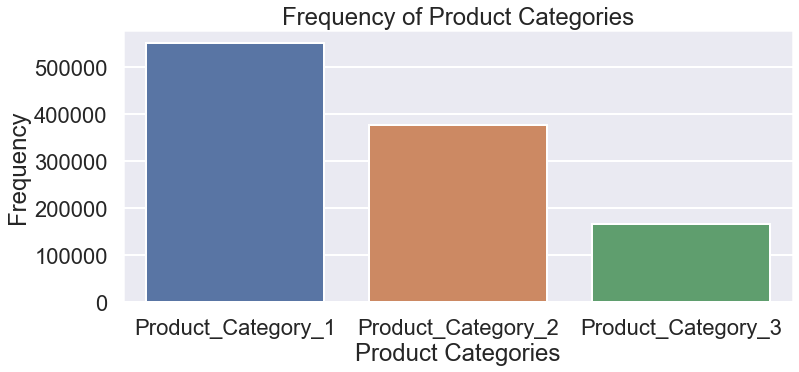

In [5]:
#plot the freqencies of the different product categories

plt.figure(figsize = (12, 5))
ax = sns.barplot(x = 'index', y = 'Category_Counts', data = df)
ax.set_xlabel('Product Categories')
_=ax.set_ylabel('Frequency')
_=plt.title('Frequency of Product Categories')

**Which Product category in each of the product categories sold the most?**

In [6]:
#create a dataframe by subsetting grouping by the product category
pd.DataFrame(data.groupby('Product_Category_1').size().sort_values(ascending=False).head(8),
             columns = ['Times Purchased'])

,Times Purchased
Product_Category_1,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753


In [7]:
pd.DataFrame(data.groupby('Product_Category_2').size().sort_values(ascending=False).head(8),
             columns = ['Times Purchased'])

,Times Purchased
Product_Category_2,
8.0,64088
14.0,55108
2.0,49217
16.0,43255
15.0,37855
5.0,26235
4.0,25677
6.0,16466


In [8]:
pd.DataFrame(data.groupby('Product_Category_3').size().sort_values(ascending=False).head(8),
             columns = ['Times Purchased'])

,Times Purchased
Product_Category_3,
16.0,32636
15.0,28013
14.0,18428
17.0,16702
5.0,16658
8.0,12562
9.0,11579
12.0,9246


**Reconstruct the Product Category feature and visualize the spend by individual product category.**

In [9]:

#Take the Product Category and Purchase columns and asign to a new df,
#renaming the product category column
df = data[data.Product_Category_1.notnull()][['Product_Category_1',
                                              'Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})


#take the Purchase mean from the fully combined product categories
num = np.asarray(df.groupby('Product_Categories').Purchase.mean()).mean()




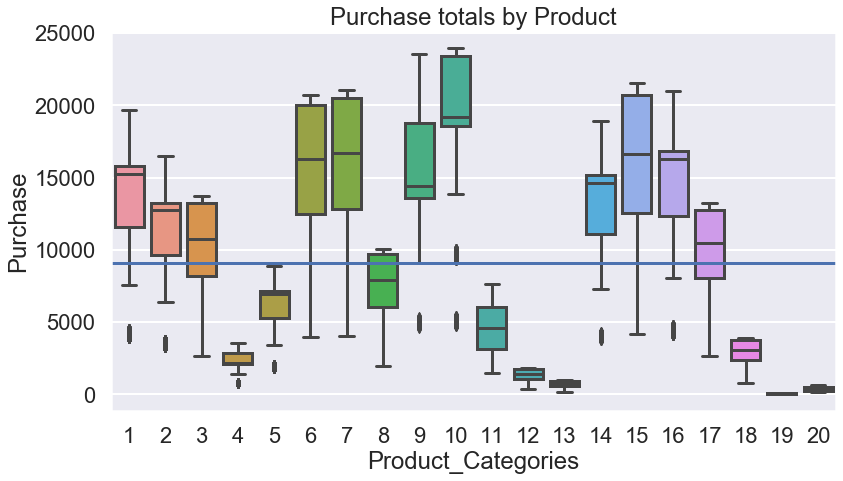

In [10]:
#plot the categories along with a horizontal lline representing the mean of all product categories
plt.figure(figsize = (13, 7))
ax = sns.boxplot(y = 'Purchase', x = 'Product_Categories', data = df )
plt.axhline(y=num)
_=plt.title('Purchase totals by Product')

It appears there is some variability among product categories around the mean, this is good. This may help build a better model. It appears there are some outliers with a few product categories.

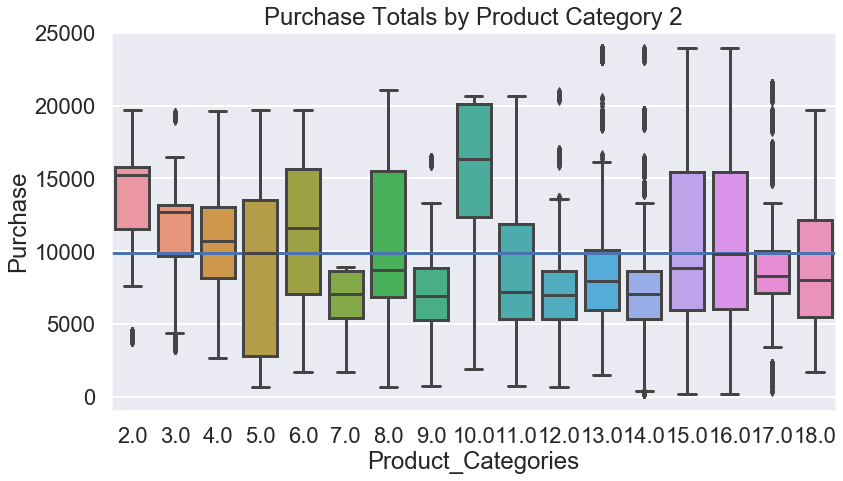

In [11]:
#For each feature, filter out the df for only those rows that have non null entries for that feature.
#Take the Product Category and Purchase columns and asign to a new df, renaming the product category column
df = data[data.Product_Category_2.notnull()][['Product_Category_2','Purchase']].rename(columns={'Product_Category_2':'Product_Categories'})


#take the Purchase mean from the fully combined product categories
num = np.asarray(df.groupby('Product_Categories').Purchase.mean()).mean()

plt.figure(figsize = (13, 7))
ax = sns.boxplot(y = 'Purchase', x = 'Product_Categories', data = df )
plt.axhline(y=num)
_=plt.title('Purchase Totals by Product Category 2')

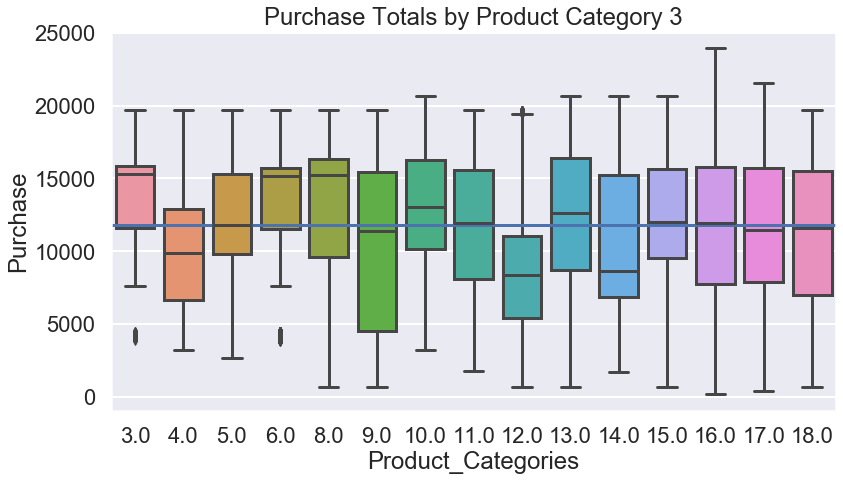

In [12]:
#For each feature, filter out the df for only those rows that have non null entries for that feature.
#Take the Product Category and Purchase columns and asign to a new df, renaming the product category column
df = data[data.Product_Category_3.notnull()][['Product_Category_3','Purchase']].rename(columns={'Product_Category_3':'Product_Categories'})


#take the Purchase mean from the fully combined product categories
num = np.asarray(df.groupby('Product_Categories').Purchase.mean()).mean()

plt.figure(figsize = (13, 7))
ax = sns.boxplot(y = 'Purchase', x = 'Product_Categories', data = df )
plt.axhline(y=num)
_=plt.title('Purchase Totals by Product Category 3')

It appears there is more variability among Category 1, then 2 and lastly 3. 
Since these are masked categories. I have to make an assumption here. If a product has assigned a category 2 number; this does not necessarily mean that all category 2 products are similar (which is the assumption above). If that assumption is true, than the above 2 graphs for product categories 2 and 3 are erroneous. 

For example - if this was a retail department store. 
And product category 1 with a value of '5' is 'Mens Shoes' and product category 1 with a value of '9' is 'Mens Clothing'.

A product with a category 1 value of '5' and a category 2 value of '6' is say 'Mens Active Shoe' shoe. 

And a product with a category 1 value of '9' and a category 2 value of '6' is say 'Sport Coat'

The assumption would then say that the the product means category 2, in this case of a Mens Active Shoe and  Mens Sport Coat, is similar and should be compared.

I will move forward with assuming that the more product categories a product has, the more specific it's designation and you cannot compare products categories after product acategory 1, unless product category 1 is the same. Then the comparison would be for instance among a Mens Active Shoe vs a Mens Dress Shoe.

**Look into details among the main product category 1**

In [13]:
df = data[data.Product_Category_1.notnull()][['Product_Category_1','Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})

**Which Product category drove the most volume?**

In [14]:
df.groupby('Product_Categories')[['Purchase']].sum().sort_values(['Purchase'], ascending = False).head(5)

,Purchase
Product_Categories,
1,1910013754
5,941835229
8,854318799
6,324150302
2,268516186


**Which Product category is most popular?**

In [15]:
df.groupby('Product_Categories')[['Purchase']].count().sort_values(['Purchase'], ascending = False).head(5)

,Purchase
Product_Categories,
5,150933
1,140378
8,113925
11,24287
2,23864


**Which product category has the highest average sales?**

In [16]:
dg = df.groupby('Product_Categories')[['Purchase']].mean().sort_values(['Purchase'], ascending = False)
dg[dg.Purchase > num]

,Purchase
Product_Categories,
10,19675.570927
7,16365.689600
6,15838.478550
9,15537.375610
15,14780.451828
16,14766.037037
1,13606.218596
14,13141.625739


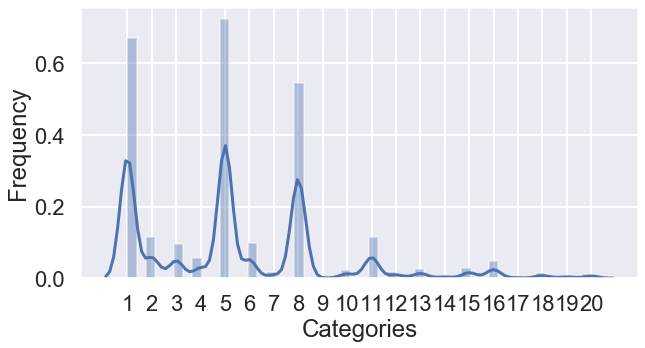

In [17]:
#frequency of categories

#set the data to numeric type
df['Product_Categories'] = pd.to_numeric(df['Product_Categories'])
plt.figure(figsize = (10, 5))  #create the plot
ax = sns.distplot(np.asarray(df['Product_Categories'])) 
ax.set_xlabel('Categories') # set the xlabel
ax.set_ylabel('Frequency') # set the ylabel
_=ax.set(xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) # create the specific x ticks

The dataset is highly imbalanced. Categories 1, 5 and 8 make up the vast majority of categories.

Lets take a look at the distribution of the Purchase data

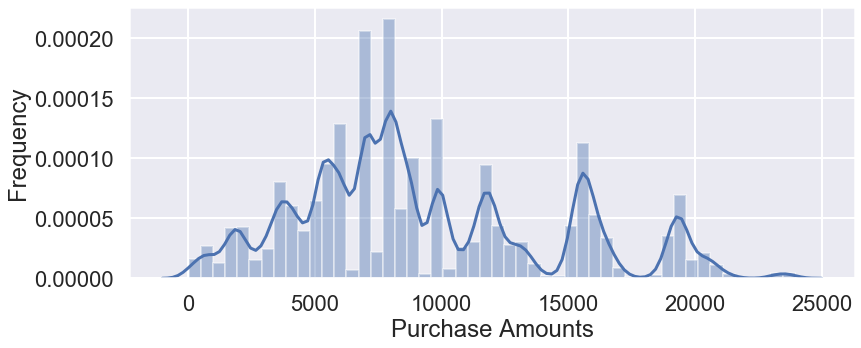

In [18]:
#distribution of purchase data
plt.figure(figsize = (13, 5))
ax = sns.distplot(np.asarray(data['Purchase']))
_=ax.set_xlabel('Purchase Amounts')
_=ax.set_ylabel('Frequency')



It seems the majority of purchases are < 15,000. With some spikes around 16,000 and 19,000.

**Lets take a look at the spend difference by age, city, stay in city, and marital status**

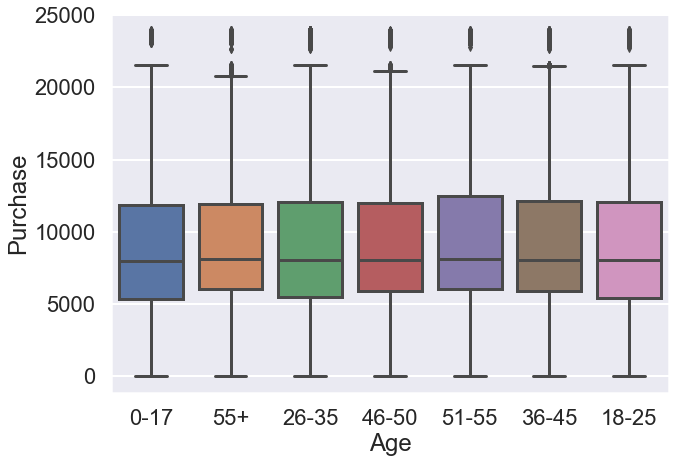

In [19]:
plt.figure(figsize = (10, 7))
ax = sns.boxplot(y = 'Purchase', x = 'Age', data = data )

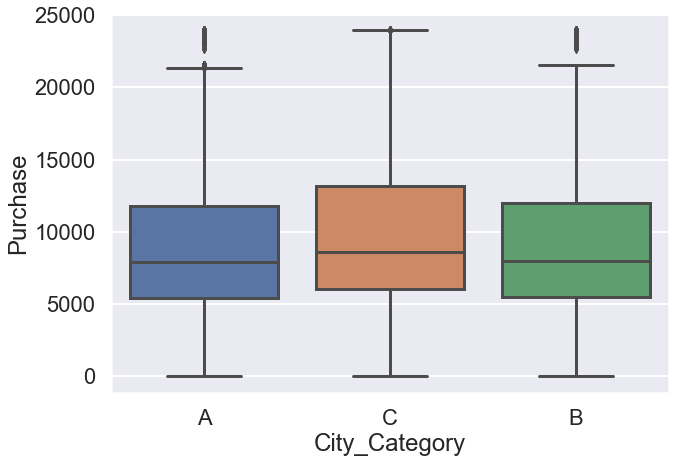

In [20]:
plt.figure(figsize = (10, 7))
ax = sns.boxplot(x = 'City_Category', y = 'Purchase' ,data = data)

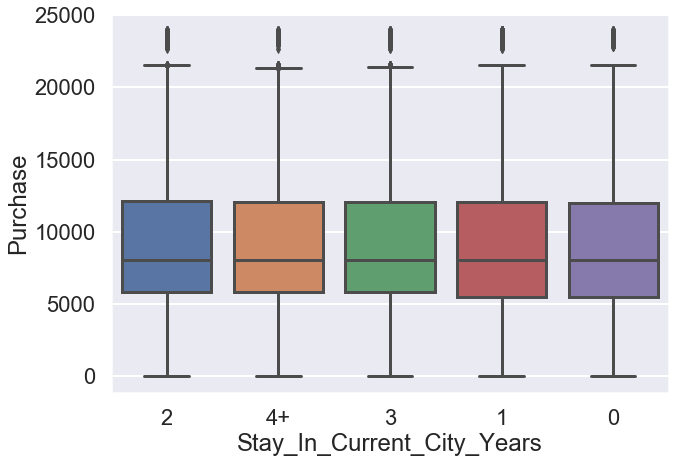

In [21]:
plt.figure(figsize = (10, 7))
ax = sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase' ,data = data)

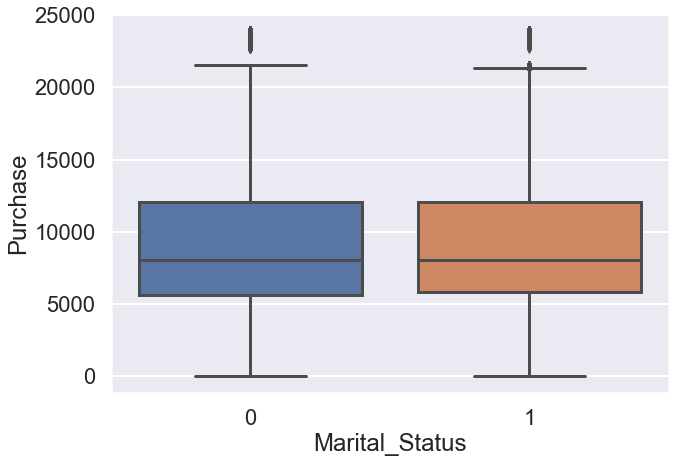

In [22]:
plt.figure(figsize = (10, 7))
ax = sns.boxplot(x = 'Marital_Status', y = 'Purchase' ,data = data)

There is not spend different between these groups, this is not surprising from the information we found earlier. It appears the best insight we can gain is from the product categories.

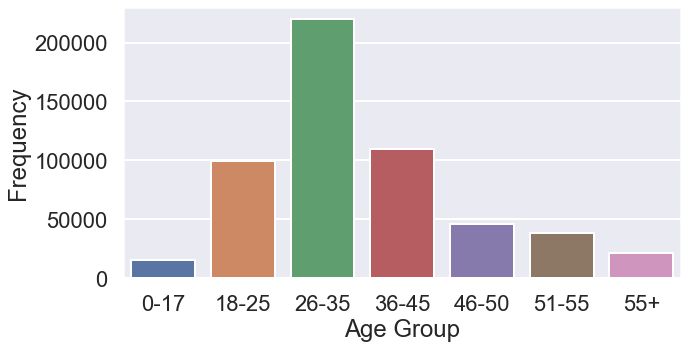

In [23]:
#Visualize the # of purchases by age group

df = pd.DataFrame(data.groupby('Age').size().sort_index()).reset_index()
df = df.rename(columns = {0:'Count'})


plt.figure(figsize = (10, 5))
ax = sns.barplot(x = 'Age', y = 'Count', data = df)
ax.set_xlabel('Age Group')
_=ax.set_ylabel('Frequency')

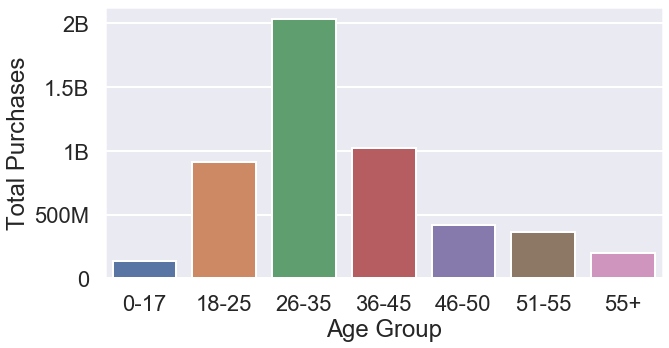

In [24]:
# Same as above, except looking at total spend

df = data[['Age', 'Purchase']]
df = df.groupby('Age')[['Purchase']].sum().reset_index()

plt.figure(figsize = (10, 5))
ax = sns.barplot(x = 'Age', y = 'Purchase', data = df)
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Purchases')
_=ax.set_yticklabels(['0','500M', '1B', '1.5B', '2B'])

Do certain age groups purchase items differently?, Lets take a look specifically at the top 8 product cateogires from cateogry 1.

In [25]:
#take the non-null rows of Product Category 1
df = data[data.Product_Category_1.notnull()][['Product_Category_1','Age', 'Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})

#display the prodcut categories as numebers
df['Product_Categories'] = pd.to_numeric(df['Product_Categories'])
# select only the top 8 8 product categories found earlier
resized = df[(df.Product_Categories == 5) | (df.Product_Categories == 1) | (df.Product_Categories == 8)|
            (df.Product_Categories == 11) | (df.Product_Categories == 2) | (df.Product_Categories == 6)|
                                            (df.Product_Categories == 3) | (df.Product_Categories == 4)]

In [26]:
#Groupby age, product categories and count the purchases in each group
resized = resized.groupby(['Age', 'Product_Categories'])[['Purchase']].count()
#pivot the table for easier graphing
resized = pd.pivot_table(resized, index = 'Age', columns = 'Product_Categories', values = 'Purchase')
resized

Product_Categories,1,2,3,4,5,6,8,11
Age,,,,,,,,
0-17,3585,805,1200,758,4330,399,2258,740
18-25,26962,4428,4710,2463,28522,3749,17911,4597
26-35,58249,8928,7662,4192,61473,8485,44256,9874
36-45,27648,4912,3854,2354,29377,3899,23296,4953
46-50,10474,2105,1376,990,11971,1622,10656,2104
51-55,9049,1781,924,678,9893,1450,9340,1458
55+,4411,905,487,318,5367,862,6208,561


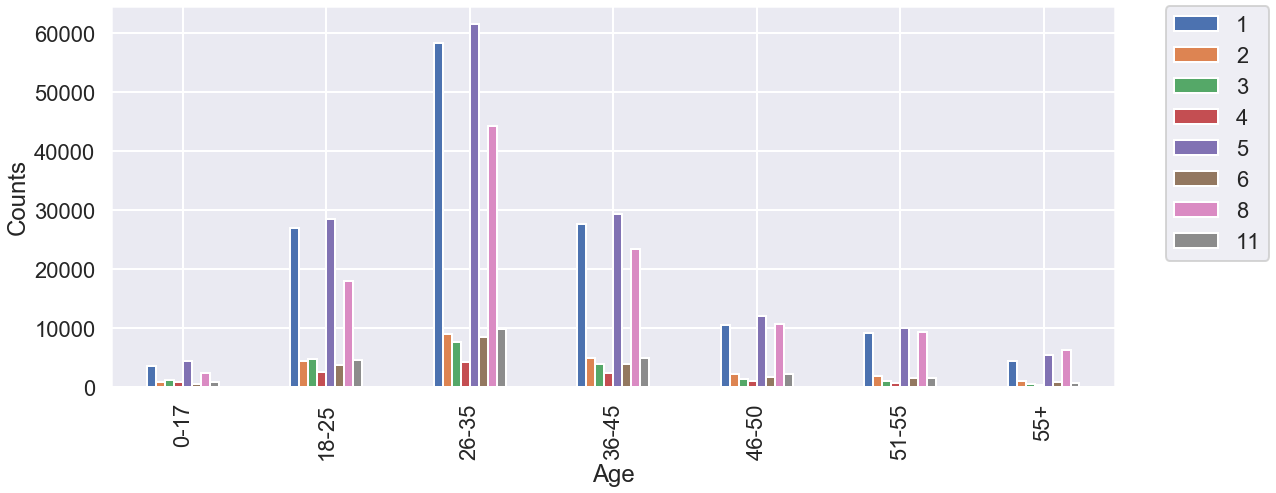

In [27]:
Figure = {'figsize' : (18,7)}

plt.close()
resized.plot(kind = 'bar' ,  **Figure)
#plt.figure(figsize = (18, 7))
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()

There are no dramatic differences in purchase ratios that we can see.

In [28]:
#create a function to find the sum of a row, and divide each cell by the total 
#     for a % of product category purchases by age group
def cat_1p(row):
    '''function to turn a column freq to a percentage'''
    ttl = row.sum()
    return row[cat]/ ttl 

In [29]:
#Group the category columns by Age, and count how many each age group has purchased
pctdf = pd.DataFrame()
for cat in resized.columns:
    pctdf[str(cat) +'_pct'] = resized.apply(cat_1p, axis = 1)

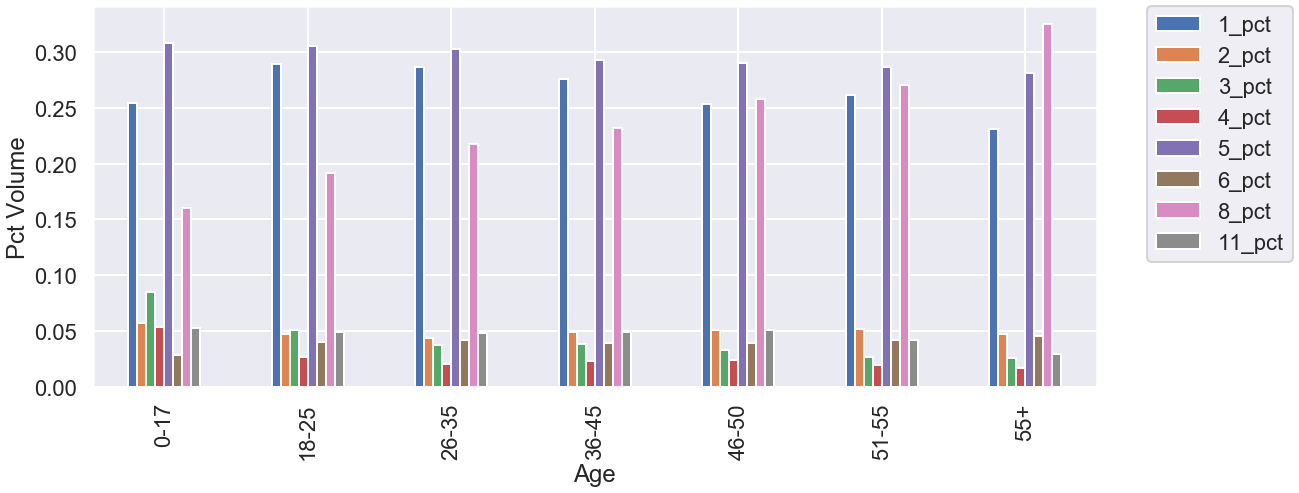

In [30]:
Figure = {'figsize' : (18,7)}

plt.close()
pctdf.plot(kind = 'bar' ,  **Figure)
#plt.figure(figsize = (18, 7))
plt.ylabel('Pct Volume')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()


There appears to be a trend. As the age groups increase, Product Category 5, 1, 3 and 4 decrease and Product category 8 increases. 

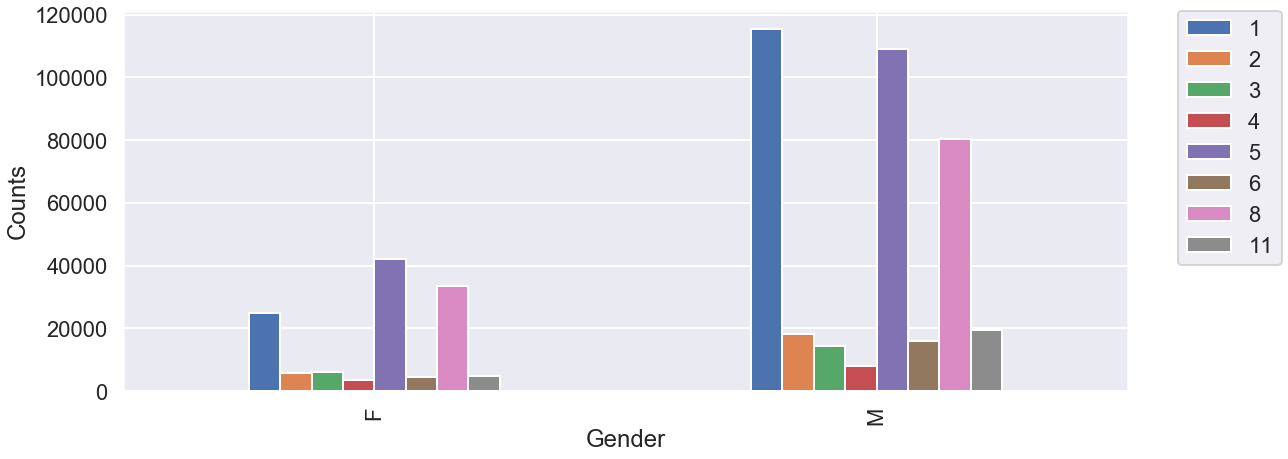

In [31]:
#take the non-null rows of Product Category 1
df = data[data.Product_Category_1.notnull()][['Product_Category_1','Gender', 'Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})

#display the prodcut categories as numebers
df['Product_Categories'] = pd.to_numeric(df['Product_Categories'])

# select only the top 8 8 product categories found earlier
resized = df[(df.Product_Categories == 5) | (df.Product_Categories == 1) | (df.Product_Categories == 8)|
            (df.Product_Categories == 11) | (df.Product_Categories == 2) | (df.Product_Categories == 6)|
                                            (df.Product_Categories == 3) | (df.Product_Categories == 4)]

#Groupby gender/product category and count the purchases in each group
resized = resized.groupby(['Gender', 'Product_Categories'])[['Purchase']].count()
#pivot the table for easier graphing
resized = pd.pivot_table(resized, index = 'Gender', columns = 'Product_Categories', values = 'Purchase')

#assign figure size
Figure = {'figsize' : (18,7)}

#plt graph
plt.close()
resized.plot(kind = 'bar' ,  **Figure)
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()


There are not major differences between the spending in categories. It looks like, possibly the Female customers purchase more of category 14 over 15 or 16 where males spend less of those three categories.

In [32]:
resized

Product_Categories,1,2,3,4,5,6,8,11
Gender,,,,,,,,
F,24831,5658,6006,3639,41961,4559,33558,4739
M,115547,18206,14207,8114,108972,15907,80367,19548


In [33]:
#create new dataframe
pctdf = pd.DataFrame()

#for each column in the 'resized' dataframe, apply the cat_1p 
#function to each column which turns the column frequency into a %
for cat in resized.columns:
    pctdf[str(cat) +'_pct'] = resized.apply(cat_1p, axis = 1)


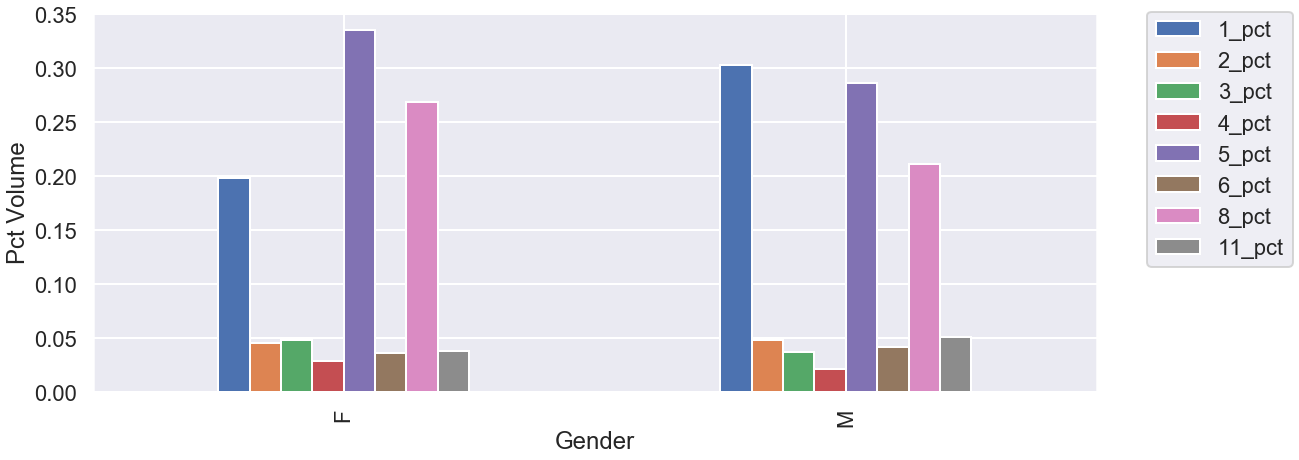

In [34]:
#plot the frequencies
Figure = {'figsize' : (18,7)}

plt.close()
pctdf.plot(kind = 'bar' ,  **Figure)
plt.ylabel('Pct Volume')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()

Males purchase more of category 1 and 15, and females purchase a higher portion of categories 5, 8, and 14.

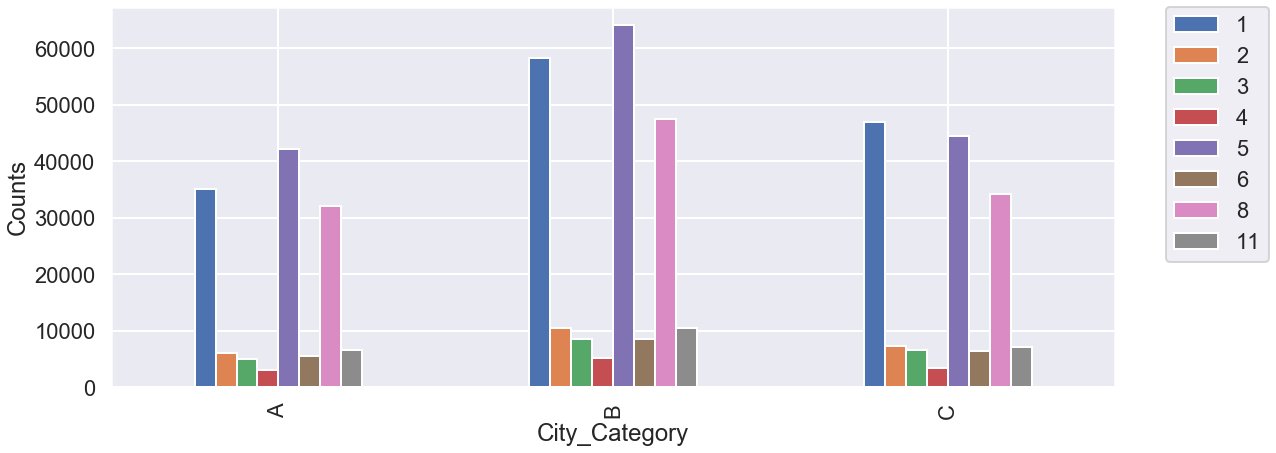

In [35]:
#take the non-null rows of Product Category 1
df = data[data.Product_Category_1.notnull()][['Product_Category_1','City_Category', 'Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})

#display the prodcut categories as numebers
df['Product_Categories'] = pd.to_numeric(df['Product_Categories'])
# select only the top 8 product categories found earlier
resized = df[(df.Product_Categories == 5) | (df.Product_Categories == 1) | (df.Product_Categories == 8)|
            (df.Product_Categories == 11) | (df.Product_Categories == 2) | (df.Product_Categories == 6)|
                                            (df.Product_Categories == 3) | (df.Product_Categories == 4)]
#groupby city category & product categories & count
resized = resized.groupby(['City_Category', 'Product_Categories'])[['Purchase']].count()

#pivot the df
resized = pd.pivot_table(resized, index = 'City_Category', 
                         columns = 'Product_Categories', values = 'Purchase')


#assign figure size
Figure = {'figsize' : (18,7)}

#plot the graph
plt.close()
resized.plot(kind = 'bar' ,  **Figure)
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()

In [36]:
#create an emtpy df
pctdf = pd.DataFrame()

#apply the function to convert frequency to %
for cat in resized.columns:
    pctdf[str(cat) +'_pct'] = resized.apply(cat_1p, axis = 1)

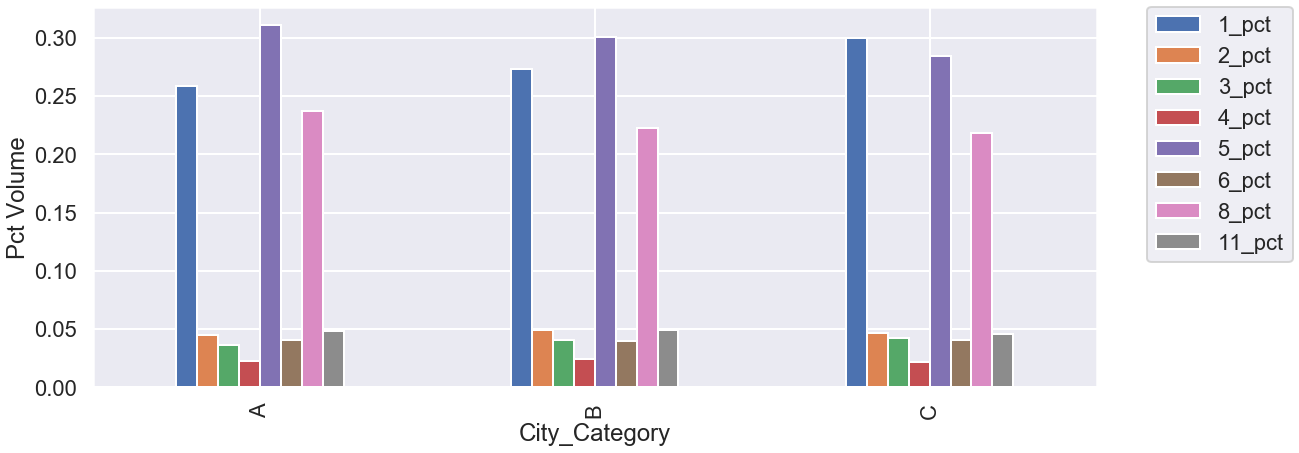

In [37]:

#plot the df
Figure = {'figsize' : (18,7)}

plt.close()
pctdf.plot(kind = 'bar' ,  **Figure)

plt.ylabel('Pct Volume')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()


No large spending differences in the City_Category feature

In [38]:
#select category 1 feature
df = data[data.Product_Category_1.notnull()][['Product_Category_1','Occupation', 'Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})

#convert column to a number
df['Product_Categories'] = pd.to_numeric(df['Product_Categories'])
#select only the top 8 categories
resized = df[(df.Product_Categories == 5) | (df.Product_Categories == 1) | (df.Product_Categories == 8)|
            (df.Product_Categories == 11) | (df.Product_Categories == 2) | (df.Product_Categories == 6)|
                                            (df.Product_Categories == 3)| (df.Product_Categories == 4)]

#groupu the df by occupation & product categories purchase counts
resized = resized.groupby(['Occupation', 'Product_Categories'])[['Purchase']].count()


#select the top 5 occupations
top_oc = list(resized.groupby('Occupation').count().sort_values('Purchase', ascending = False).index[:5])

#filter for only the top occupations
resized = resized.loc[top_oc]

In [39]:
#select category 1 feature
df = data[data.Product_Category_1.notnull()][['Product_Category_1','Occupation', 'Purchase']].rename(columns={'Product_Category_1':'Product_Categories'})

#convert column to a number
df['Product_Categories'] = pd.to_numeric(df['Product_Categories'])

#select only the top 8 categories
resized = df[(df.Product_Categories == 5) | (df.Product_Categories == 1) | (df.Product_Categories == 8)|
            (df.Product_Categories == 11) | (df.Product_Categories == 2) | (df.Product_Categories == 6)|
                                            (df.Product_Categories == 3)| (df.Product_Categories == 4)]
#find the top 5 occupations by count
top_oc = list(resized.groupby('Occupation').count().sort_values('Purchase', ascending = False).index[:5])

#groupu the df by occupation & product categories purchase counts
resized = resized.groupby(['Occupation', 'Product_Categories'])[['Purchase']].count()
#filter for only the top occupations
resized = resized.loc[top_oc]
#pivot for easier to read plot
resized = pd.pivot_table(resized, index = 'Occupation', columns = 'Product_Categories', values = 'Purchase')

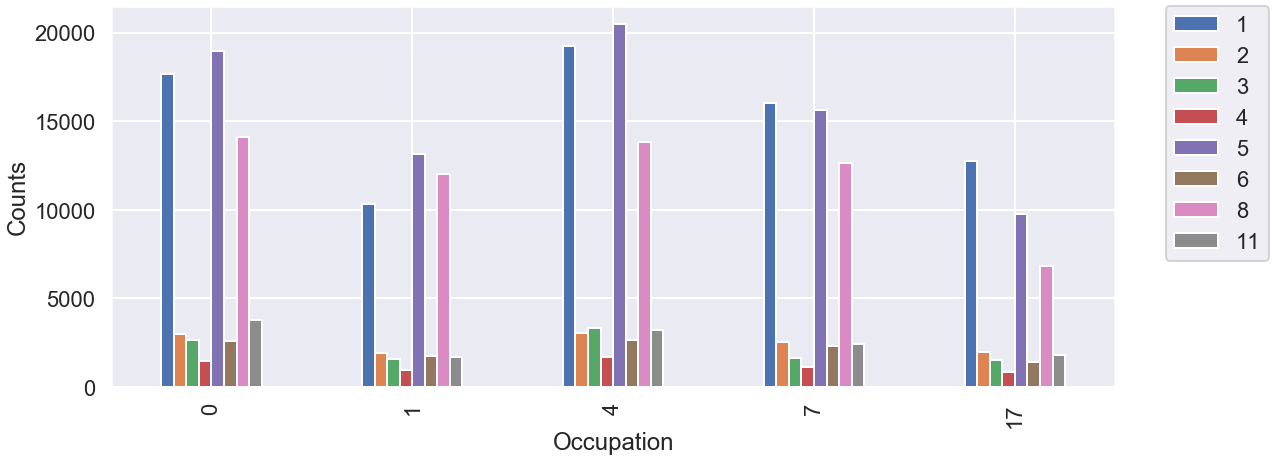

In [40]:

Figure = {'figsize' : (18,7)}

plt.close()
resized.plot(kind = 'bar' ,  **Figure)
plt.ylabel('Counts')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()

In [41]:
pctdf = pd.DataFrame()
for cat in resized.columns:
    pctdf[str(cat) +'_pct'] = resized.apply(cat_1p, axis = 1)
    


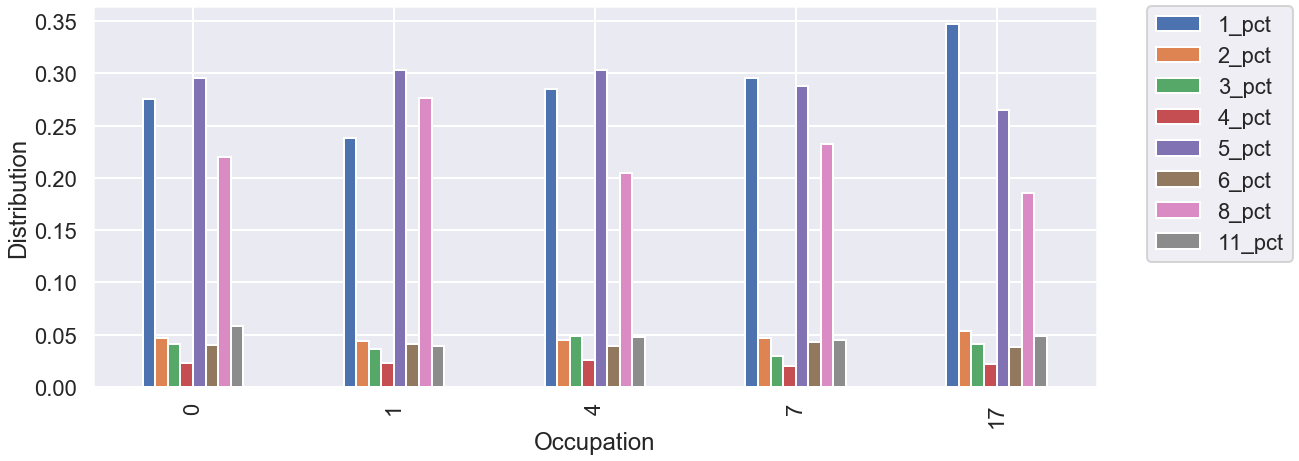

In [42]:
Figure = {'figsize' : (18,7)}

plt.close()
pctdf.plot(kind = 'bar' ,  **Figure)

plt.ylabel('Distribution')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

plt.show()

The top 5 occupations' top three categories are 1,5 and 8. There is not large variability in the purchases.